<a href="https://cognitiveclass.ai"><img src = "https://cognitiveclass.ai/system/portals/logos/5ebc/7166/a5ad/b600/013d/76aa/original/cc-logo.png?1589431217" width = 400> </a>

<h1 align=center>IBM Data Science Professional Certificate</h1>
<h2 align=center>Applied Data Science Capstone - Week 3</h2>

<h3 align=center>Segmenting and Clustering Neighborhoods in Toronto</h3>

### Question 1

Import pandas and numpy libraries

In [1]:
import pandas as pd
import numpy as np

I have used pandas library to load and parse HTML URL, its return a list with two tables parsed to dataframes

In [2]:
dfs = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
dfs

[    Postal Code           Borough  \
 0           M1A      Not assigned   
 1           M2A      Not assigned   
 2           M3A        North York   
 3           M4A        North York   
 4           M5A  Downtown Toronto   
 ..          ...               ...   
 175         M5Z      Not assigned   
 176         M6Z      Not assigned   
 177         M7Z      Not assigned   
 178         M8Z         Etobicoke   
 179         M9Z      Not assigned   
 
                                          Neighbourhood  
 0                                         Not assigned  
 1                                         Not assigned  
 2                                            Parkwoods  
 3                                     Victoria Village  
 4                            Regent Park, Harbourfront  
 ..                                                 ...  
 175                                       Not assigned  
 176                                       Not assigned  
 177                

The first element of the list is what we want.

In [3]:
toronto_neighbourhood_from_html=dfs[0]
toronto_neighbourhood_from_html

,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Let's start the data cleaning.
1. Ignore cells with a borough that is Not assigned.

In [4]:
toronto_neighbourhood=toronto_neighbourhood_from_html[toronto_neighbourhood_from_html['Borough']!='Not assigned'].reset_index(drop=True)
toronto_neighbourhood

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


2.More than one neighborhood can exist in one postal code area.

In [5]:
if toronto_neighbourhood['Postal Code'].unique().size == toronto_neighbourhood['Postal Code'].size:
    print('Do not exist duplicate postal code')

Do not exist duplicate postal code


3.If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.

In [6]:
for i in toronto_neighbourhood.index:
    if toronto_neighbourhood.at[i,'Neighbourhood']=='Not assigned':
        toronto_neighbourhood.at[i,'Neighbourhood']==toronto_neighbourhood.at[i,'Borough']
toronto_neighbourhood

,Postal Code,Borough,Neighbourhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [7]:
toronto_neighbourhood.shape

(103, 3)

### Question 2

I did not able to get geographical coordinates of postal codes from geocoder library, so i have used the file 'Geospatial_data.csv'

In [8]:
geolocation=pd.read_csv('https://cocl.us/Geospatial_data')
geolocation

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
...,...,...,...
98,M9N,43.706876,-79.518188
99,M9P,43.696319,-79.532242
100,M9R,43.688905,-79.554724
101,M9V,43.739416,-79.588437


Using MERGE function to "combine" both dataframe in just one dataframe using 'Postal Code' as inner join key

In [9]:
toronto_neighbourhood_with_geo=pd.merge(toronto_neighbourhood, geolocation, on="Postal Code")
toronto_neighbourhood_with_geo

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [10]:
toronto_neighbourhood_with_geo.shape

(103, 5)

### Question 3

Which boroughs exist in Toronto?

In [11]:
toronto_neighbourhood_with_geo['Borough'].unique()

array(['North York', 'Downtown Toronto', 'Etobicoke', 'Scarborough',
       'East York', 'York', 'East Toronto', 'West Toronto',
       'Central Toronto', 'Mississauga'], dtype=object)

Let's plot the postal code locations on Toronto map

In [12]:
! pip install geopy
from geopy.geocoders import Nominatim

! pip install folium==0.5.0
import folium # plotting library

Find Toronto coordinates

In [13]:
address = 'Toronto, ON'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [33]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, code in zip(toronto_neighbourhood_with_geo['Latitude'], toronto_neighbourhood_with_geo['Longitude'], toronto_neighbourhood_with_geo['Postal Code']):
    label = folium.Popup("Postal Code: {}".format(code), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

map_toronto

Now let's try to find all pizza places in Toronto 

In [15]:
import json # library to handle JSON files
import requests # library to handle requests

In [32]:
# The code was removed by Watson Studio for sharing.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# type your answer here
toronto_venues = getNearbyVenues(names=toronto_neighbourhood_with_geo['Neighbourhood'],
                                   latitudes=toronto_neighbourhood_with_geo['Latitude'],
                                   longitudes=toronto_neighbourhood_with_geo['Longitude']
                                  )

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [34]:
toronto_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
...,...,...,...,...,...,...,...
2116,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,McDonald's,43.630002,-79.518198,Fast Food Restaurant
2117,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Koala Tan Tanning Salon & Sunless Spa,43.631370,-79.519006,Tanning Salon
2118,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Once Upon A Child,43.631075,-79.518290,Kids Store
2119,"Mimico NW, The Queensway West, South of Bloor,...",43.628841,-79.520999,Kingsway Boxing Club,43.627254,-79.526684,Gym


In [35]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

Let's find out which top 10 more common Venue Categories.

In [36]:
toronto_venues_grouped=toronto_venues.groupby(by='Venue Category').count()
toronto_venues_grouped.sort_values(by='Neighborhood',ascending=False,inplace=True)
toronto_venues_grouped=toronto_venues_grouped['Neighborhood'].head(10)
toronto_venues_grouped

Venue Category
Coffee Shop            189
Café                    93
Restaurant              65
Park                    53
Italian Restaurant      44
Sandwich Place          43
Pizza Place             43
Hotel                   42
Japanese Restaurant     41
Bakery                  39
Name: Neighborhood, dtype: int64

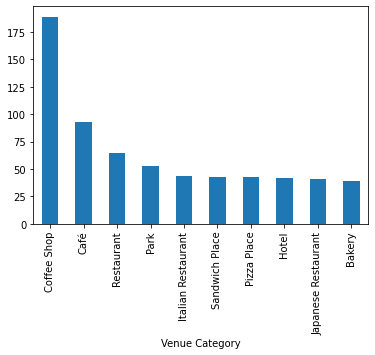

In [37]:
toronto_venues_grouped.plot(kind='bar')

The coffee shop is the venue category more common

In [38]:
coffeshop=toronto_venues[toronto_venues['Venue Category'] == 'Coffee Shop'].reset_index(drop=True)

In [39]:
coffeshop.drop_duplicates(inplace=True)

In [40]:
coffeshop

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
1,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,"Regent Park, Harbourfront",43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
3,"Regent Park, Harbourfront",43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
4,"Regent Park, Harbourfront",43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
...,...,...,...,...,...,...,...
184,Church and Wellesley,43.665860,-79.383160,Piedmont Coffee Bar,43.668286,-79.382520,Coffee Shop
185,Church and Wellesley,43.665860,-79.383160,Rooster Coffee House,43.669654,-79.379871,Coffee Shop
186,Church and Wellesley,43.665860,-79.383160,Starbucks,43.662407,-79.385943,Coffee Shop
187,Church and Wellesley,43.665860,-79.383160,The Drink,43.664167,-79.380149,Coffee Shop


Which is the more common venue?

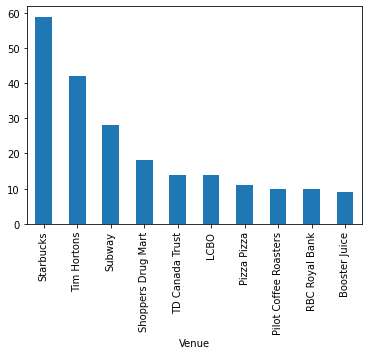

In [41]:
toronto_venues_grouped=toronto_venues.groupby(by='Venue').count()
toronto_venues_grouped.sort_values(by='Neighborhood',ascending=False,inplace=True)
toronto_venues_grouped=toronto_venues_grouped['Neighborhood'].head(10)
toronto_venues_grouped.plot(kind='bar')

Bingo, Starbucks!

In [42]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Let's use one cluster for which Borough k=10

In [43]:
# set number of clusters
kclusters = 10
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(coffeshop.loc[:,'Venue Latitude':'Venue Longitude'])

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([8, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 8, 8, 0, 0, 0, 0, 0, 4, 8, 0, 0, 0, 0, 0, 0, 5, 5, 8,
       8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 3, 3, 8, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 9, 9, 9, 5, 8, 8, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 9, 8,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 7, 7, 6, 3, 3, 6,
       3, 7, 7, 9, 9, 9, 4, 4, 4, 7, 7, 6, 6, 6, 6, 9, 9, 0, 9, 7, 7, 0,
       2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [44]:
coffeshop.insert(0, 'Cluster Labels', kmeans.labels_)
coffeshop

,Cluster Labels,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,8,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop
1,0,"Regent Park, Harbourfront",43.654260,-79.360636,Tandem Coffee,43.653559,-79.361809,Coffee Shop
2,0,"Regent Park, Harbourfront",43.654260,-79.360636,Arvo,43.649963,-79.361442,Coffee Shop
3,0,"Regent Park, Harbourfront",43.654260,-79.360636,Sumach Espresso,43.658135,-79.359515,Coffee Shop
4,0,"Regent Park, Harbourfront",43.654260,-79.360636,Rooster Coffee,43.651900,-79.365609,Coffee Shop
...,...,...,...,...,...,...,...,...
184,0,Church and Wellesley,43.665860,-79.383160,Piedmont Coffee Bar,43.668286,-79.382520,Coffee Shop
185,0,Church and Wellesley,43.665860,-79.383160,Rooster Coffee House,43.669654,-79.379871,Coffee Shop
186,0,Church and Wellesley,43.665860,-79.383160,Starbucks,43.662407,-79.385943,Coffee Shop
187,0,Church and Wellesley,43.665860,-79.383160,The Drink,43.664167,-79.380149,Coffee Shop


Let's find these coffeshops on the map!

In [45]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, cluster,venue in zip(coffeshop['Venue Latitude'], coffeshop['Venue Longitude'], coffeshop['Cluster Labels'],coffeshop['Venue']):
    label = folium.Popup(venue, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters